# Data Cleanser Project
Healthcare Patient Records


## 1. Load Libraries and Dataset

In [70]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
import matplotlib.pyplot as plt

### 3.import dataset

In [85]:
df = pd.read_csv('Customer_Credit_Risk_Dataset.csv')
df.sample(5)

,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,repayment_history,transaction_count,spending_ratio,default_flag,join_date
146,10147,35.0,Male,South,Primary,Unemployed,684716.289263,82482.034604,Home,761.845764,0,156,10.804338,0,2021-12-21
354,10355,53.0,Female,North,Post-Graduate,Self-Employed,314467.337642,634222.603897,Business,NaN,7,32,55.034944,0,2017-07-26
462,10463,44.0,Male,East,Primary,Salaried,NaN,216886.279467,Car,647.316816,5,5,6.650001,1,2016-09-07
258,10259,57.0,Male,South,Secondary,Self-Employed,665973.607614,859326.040781,Business,597.383765,9,75,10.984243,1,2022-09-20
453,10454,54.0,Male,South,Secondary,Self-Employed,239716.845036,277194.297508,Home,519.865647,5,156,20.791182,1,2023-02-07


# Part C : Data Understanding & cleaning

### 4.Data Exploration

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        500 non-null    int64  
 1   age                475 non-null    float64
 2   gender             500 non-null    object 
 3   region             500 non-null    object 
 4   education_level    500 non-null    object 
 5   employment_type    475 non-null    object 
 6   annual_income      475 non-null    float64
 7   loan_amount        500 non-null    float64
 8   loan_purpose       500 non-null    object 
 9   credit_score       475 non-null    float64
 10  repayment_history  500 non-null    int64  
 11  transaction_count  500 non-null    int64  
 12  spending_ratio     500 non-null    float64
 13  default_flag       500 non-null    int64  
 14  join_date          500 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 58.7+ KB


In [26]:
df.describe(include="all")


,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,repayment_history,transaction_count,spending_ratio,default_flag,join_date
count,500.000000,475.000000,500,500,500,475,4.750000e+02,5.000000e+02,500,475.000000,500.000000,500.000000,500.000000,500.000000,500
unique,NaN,NaN,3,4,4,3,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,471
top,NaN,NaN,Male,North,Post-Graduate,Self-Employed,NaN,NaN,Home,NaN,NaN,NaN,NaN,NaN,2018-12-14
freq,NaN,NaN,330,136,133,168,NaN,NaN,114,NaN,NaN,NaN,NaN,NaN,2
mean,10250.500000,43.280000,NaN,NaN,NaN,NaN,6.498615e+05,3.395583e+05,NaN,652.164615,5.704000,105.322000,27.236065,0.264000,NaN
std,144.481833,12.700689,NaN,NaN,NaN,NaN,4.375798e+05,3.659677e+05,NaN,100.467586,3.439774,57.298836,15.005458,0.441241,NaN
min,10001.000000,21.000000,NaN,NaN,NaN,NaN,-1.015543e+05,5.314554e+02,NaN,317.524428,0.000000,5.000000,0.779279,0.000000,NaN
25%,10125.750000,32.000000,NaN,NaN,NaN,NaN,4.294511e+05,9.299811e+04,NaN,581.908404,3.000000,54.000000,15.175355,0.000000,NaN
50%,10250.500000,45.000000,NaN,NaN,NaN,NaN,5.950537e+05,2.357874e+05,NaN,650.137965,6.000000,106.000000,25.982205,0.000000,NaN
75%,10375.250000,53.500000,NaN,NaN,NaN,NaN,7.962655e+05,4.629116e+05,NaN,720.009997,9.000000,156.000000,37.545394,1.000000,NaN


In [27]:
df.duplicated().sum()

np.int64(0)

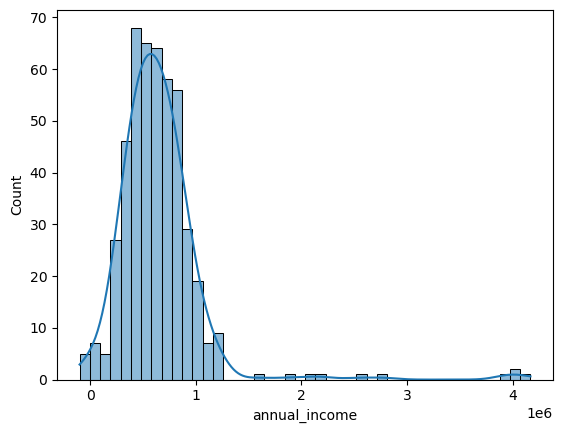

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["annual_income"], kde=True)
plt.show()


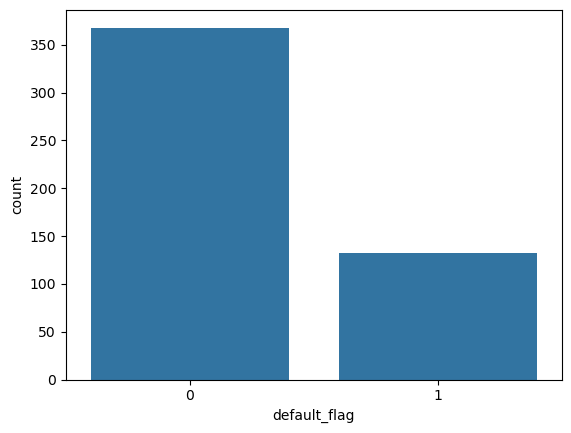

In [29]:
sns.countplot(x="default_flag", data=df)
plt.show()

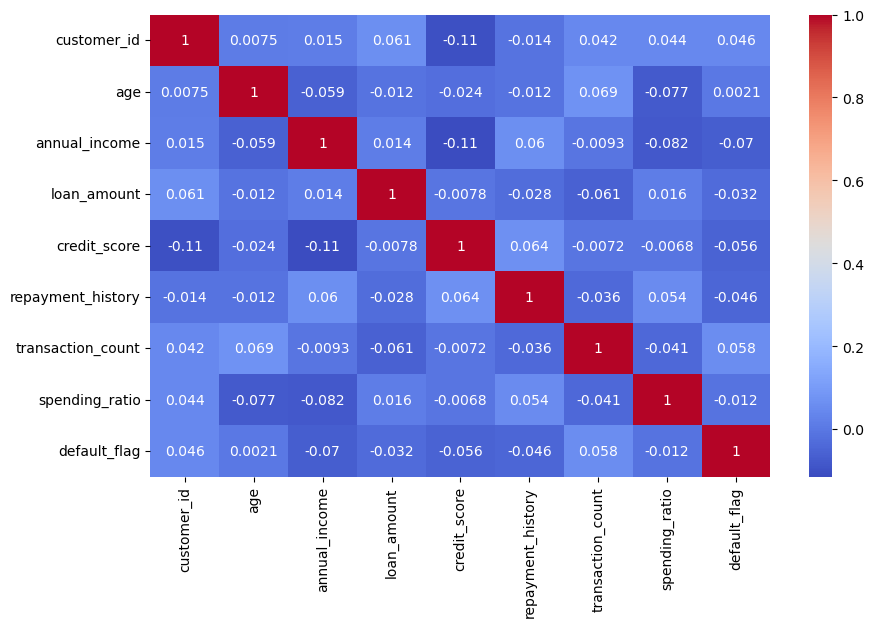

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


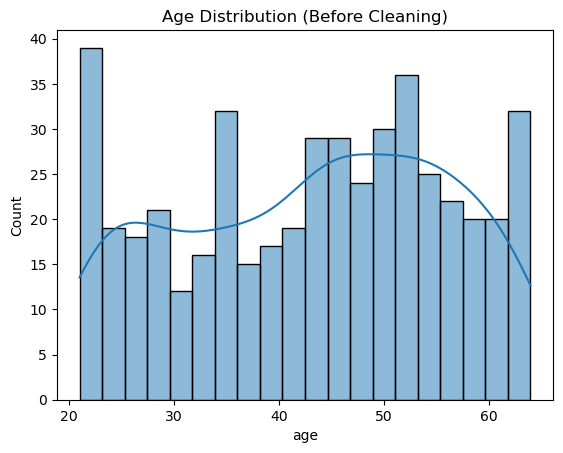

In [31]:
plt.figure()
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution (Before Cleaning)")
plt.show()


## 6.Handling Missing Values

In [32]:
df.isnull().sum()


customer_id           0
age                  25
gender                0
region                0
education_level       0
employment_type      25
annual_income        25
loan_amount           0
loan_purpose          0
credit_score         25
repayment_history     0
transaction_count     0
spending_ratio        0
default_flag          0
join_date             0
dtype: int64

* Simple Imputer(numerical:mean/median)

In [33]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy="mean")
df["age"] = mean_imputer.fit_transform(df[["age"]])


In [34]:
median_imputer = SimpleImputer(strategy="median")
df[["annual_income","credit_score"]] = median_imputer.fit_transform(
    df[["annual_income","credit_score"]]
)


* Simple Imputer (Category:most frequent)

In [35]:
cat_imputer = SimpleImputer(strategy="most_frequent")
df[["gender","employment_type"]] = cat_imputer.fit_transform(
    df[["gender","employment_type"]]
)


* KNN Imputer (multivariate)

In [36]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
df[["annual_income","loan_amount","credit_score"]] = knn_imputer.fit_transform(
    df[["annual_income","loan_amount","credit_score"]]
)


* MICE Algorithem

In [37]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice = IterativeImputer(random_state=42)
df[["annual_income","loan_amount","credit_score"]] = mice.fit_transform(
    df[["annual_income","loan_amount","credit_score"]]
)


* Complete case analysis 

In [38]:
def random_sample_imputation(df, column):
    random_sample = df[column].dropna().sample(
        df[column].isnull().sum(),
        random_state=42
    )
    random_sample.index = df[df[column].isnull()].index
    df.loc[df[column].isnull(), column] = random_sample

random_sample_imputation(df, "credit_score")


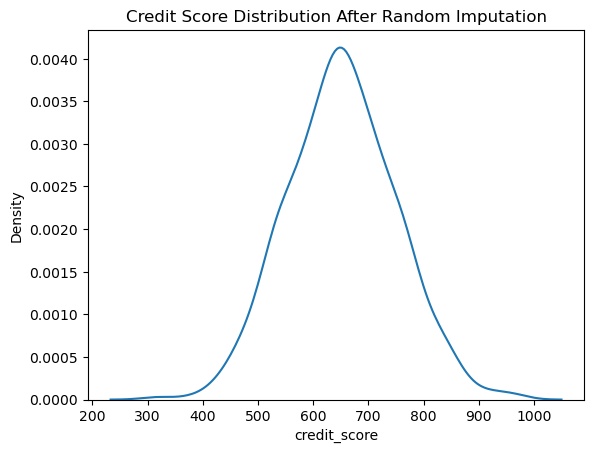

In [39]:
sns.kdeplot(df["credit_score"])
plt.title("Credit Score Distribution After Random Imputation")
plt.show()


In [40]:
df.isnull().sum()


customer_id          0
age                  0
gender               0
region               0
education_level      0
employment_type      0
annual_income        0
loan_amount          0
loan_purpose         0
credit_score         0
repayment_history    0
transaction_count    0
spending_ratio       0
default_flag         0
join_date            0
dtype: int64

## Part D: Outlier Handling

In [41]:
from scipy.stats import zscore

df = df[(zscore(df["annual_income"]) < 3)]



In [42]:
Q1 = df["annual_income"].quantile(0.25)
Q3 = df["annual_income"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df["annual_income"] = df["annual_income"].clip(lower, upper)


In [43]:
df["debt_to_income"] = df["loan_amount"] / df["annual_income"]

In [63]:
lower_limit = df["annual_income"].quantile(0.01)
upper_limit = df["annual_income"].quantile(0.99)

lower_limit, upper_limit


(np.float64(-2.446839357062926), np.float64(2.5177653815677563))

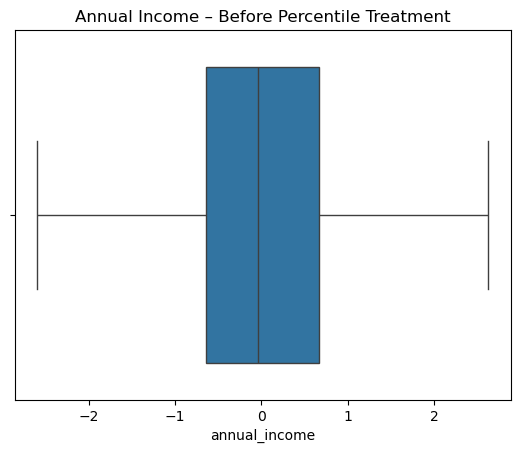

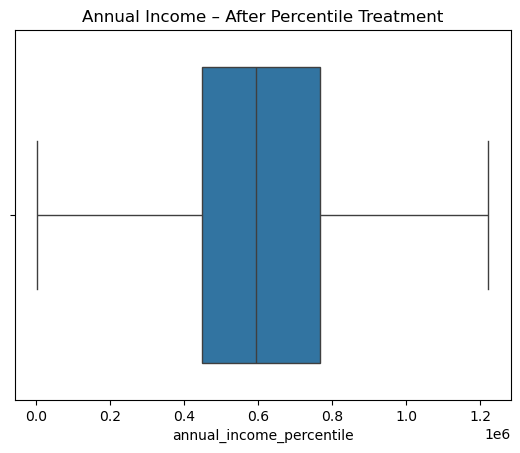

In [64]:
plt.figure()
sns.boxplot(x=df["annual_income"])
plt.title("Annual Income – Before Percentile Treatment")
plt.show()

plt.figure()
sns.boxplot(x=df["annual_income_percentile"])
plt.title("Annual Income – After Percentile Treatment")
plt.show()


In [46]:
from scipy.stats.mstats import winsorize

df["annual_income_winsor"] = winsorize(
    df["annual_income"],
    limits=[0.05, 0.05]
)


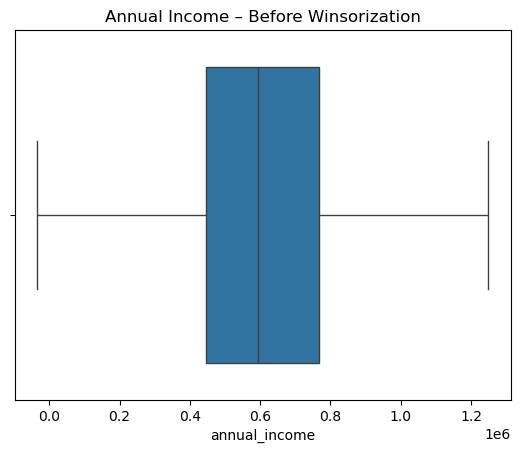

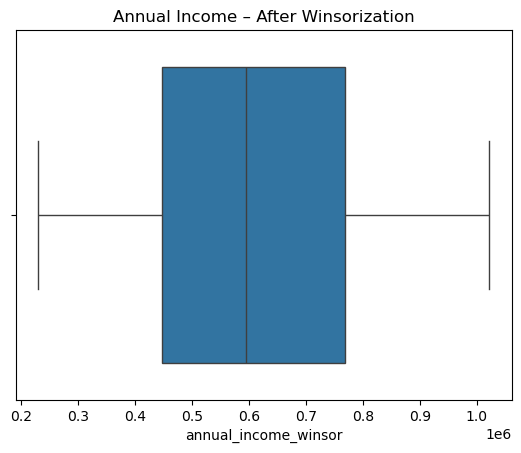

In [47]:
plt.figure()
sns.boxplot(x=df["annual_income"])
plt.title("Annual Income – Before Winsorization")
plt.show()

plt.figure()
sns.boxplot(x=df["annual_income_winsor"])
plt.title("Annual Income – After Winsorization")
plt.show()


## PART E: FEATURE ENGINEERING

#### 8.Handling Variable Types

In [73]:
df[["age", "spending_ratio", "gender", "region"]].head()


,age,spending_ratio,gender,region
0,59.0,3.801693,Male,East
1,49.0,18.187881,Female,West
2,35.0,29.316614,Male,East
3,63.0,11.367140,Female,East
4,28.0,21.846702,Male,East


In [75]:
df["spending_ratio_log"] = np.log1p(df["spending_ratio"])
df_encoded = pd.get_dummies(
    df,
    columns=["gender", "region"],
    drop_first=True
)



In [76]:
df_encoded[
    ["age", "spending_ratio_log"] +
    [col for col in df_encoded.columns if "gender_" in col or "region_" in col]
].head()


,age,spending_ratio_log,gender_Male,gender_Other,region_North,region_South,region_West
0,59.0,1.568969,True,False,False,False,False
1,49.0,2.954279,False,False,False,False,True
2,35.0,3.411696,True,False,False,False,False
3,63.0,2.515043,False,False,False,False,False
4,28.0,3.128807,True,False,False,False,False


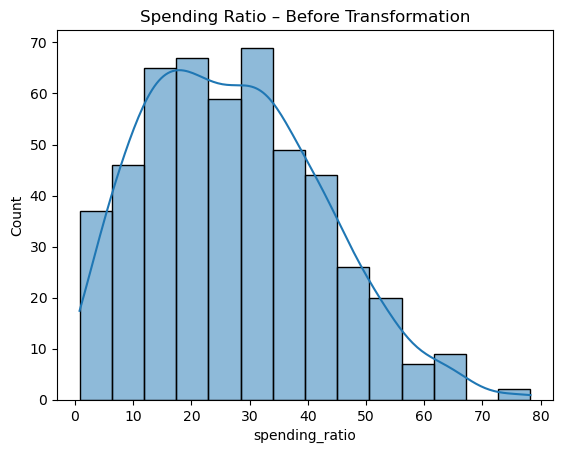

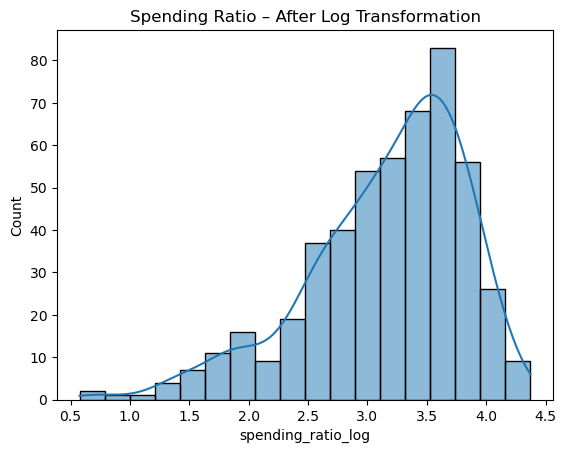

In [77]:
plt.figure()
sns.histplot(df["spending_ratio"], kde=True)
plt.title("Spending Ratio – Before Transformation")
plt.show()

plt.figure()
sns.histplot(df["spending_ratio_log"], kde=True)
plt.title("Spending Ratio – After Log Transformation")
plt.show()


* Handling Date & Time Variables

In [89]:
df["join_date"] = pd.to_datetime(df["join_date"])

df["join year"] = df["join_date"].dt.year
df["join month"] = df["join_date"].dt.month
df["join day"] = df["join_date"].dt.day
df["join weekday"] = df["join_date"].dt.weekday


In [91]:
df[["join_date","join year", "join month", "join day", "join weekday"]].head()


,join_date,join year,join month,join day,join weekday
0,2017-05-17,2017,5,17,2
1,2019-06-15,2019,6,15,5
2,2019-09-28,2019,9,28,5
3,2015-10-05,2015,10,5,0
4,2015-06-19,2015,6,19,4


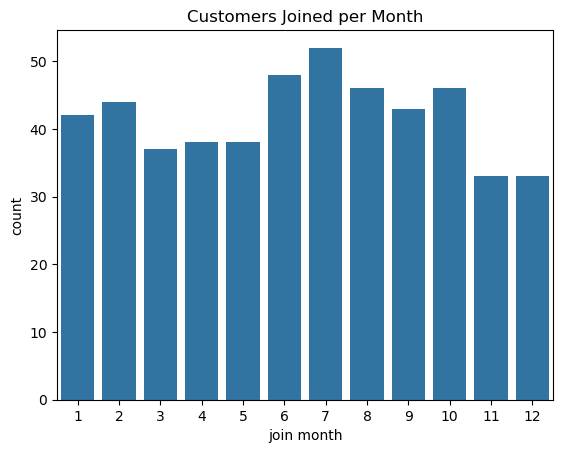

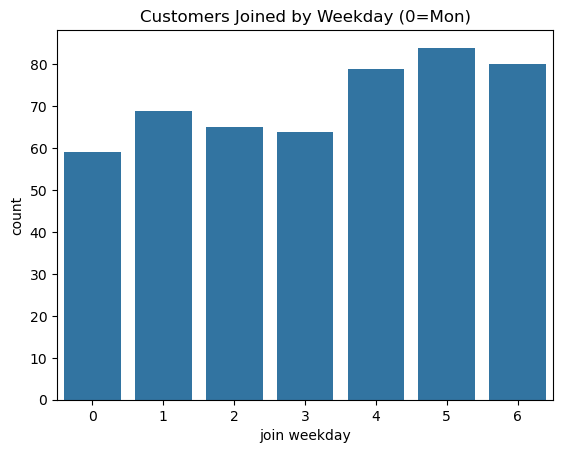

In [93]:
plt.figure()
sns.countplot(x=df["join month"])
plt.title("Customers Joined per Month")
plt.show()

plt.figure()
sns.countplot(x=df["join weekday"])
plt.title("Customers Joined by Weekday (0=Mon)")
plt.show()


## 9.Encoding Categorical cariables:

* Ordinal Encoding(edu. level)

In [94]:
df["education_level"].value_counts()


education_level
Post-Graduate    133
Secondary        132
Primary          118
Graduate         117
Name: count, dtype: int64

In [99]:
from sklearn.preprocessing import OrdinalEncoder

education_order = [["Primary", "Secondary", "Graduate", "Post-Graduate"]]

ordinal_encoder = OrdinalEncoder(categories=education_order)
df["education level encoded"] = ordinal_encoder.fit_transform(
    df[["education_level"]]
)


In [101]:
df[["education_level", "education level encoded"]].head()


,education_level,education level encoded
0,Graduate,2.0
1,Primary,0.0
2,Post-Graduate,3.0
3,Secondary,1.0
4,Secondary,1.0


* Lable Encoding(gender)

In [102]:
df["gender"].value_counts()


gender
Male      330
Female    148
Other      22
Name: count, dtype: int64

In [103]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["gender_encoded"] = label_encoder.fit_transform(df["gender"])


In [104]:
df[["gender", "gender_encoded"]].head()


,gender,gender_encoded
0,Male,1
1,Female,0
2,Male,1
3,Female,0
4,Male,1


* One-Hot Encoding(region & loan purpose)

In [105]:
df[["region", "loan_purpose"]].head()


,region,loan_purpose
0,East,Education
1,West,Education
2,East,Other
3,East,Education
4,East,Business


In [106]:
df_encoded = pd.get_dummies(
    df,
    columns=["region", "loan_purpose"],
    drop_first=True
)


In [107]:
encoded_columns = [col for col in df_encoded.columns if "region_" in col or "loan_purpose_" in col]
df_encoded[encoded_columns].head()


,region_North,region_South,region_West,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other
0,False,False,False,False,True,False,False
1,False,False,True,False,True,False,False
2,False,False,False,False,False,False,True
3,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False


In [108]:
df[["education_level", "gender", "region", "loan_purpose"]].dtypes


education_level    object
gender             object
region             object
loan_purpose       object
dtype: object

### 10.Encoding Numerical Features

* Binning (diacretize income into gropus)


Binning divides a continuous numerical variable into fixed intervals (bins), converting it into a categorical feature.

In [110]:
df["annual_income"].describe()

count    4.750000e+02
mean     6.498615e+05
std      4.375798e+05
min     -1.015543e+05
25%      4.294511e+05
50%      5.950537e+05
75%      7.962655e+05
max      4.169048e+06
Name: annual_income, dtype: float64

In [111]:
df["income_bin"] = pd.cut(
    df["annual_income"],
    bins=4,
    labels=["Low", "Medium", "High", "Very High"]
)

In [112]:
df[["annual_income", "income_bin"]].head()

,annual_income,income_bin
0,267192.551821,Low
1,669582.265305,Low
2,580230.313098,Low
3,229928.975448,Low
4,761479.456448,Low


* Discretization (Repayment History)

Discretization converts count-based numerical values into risk categories.

In [125]:
df["repayment_history"].value_counts().sort_index()

repayment_history
0     30
1     40
2     41
3     53
4     36
5     47
6     42
7     32
8     37
9     46
10    50
11    46
Name: count, dtype: int64

In [134]:
df["repayment_risk"] = pd.cut(
    df["repayment_history"],
    bins=[-1, 3, 5, 50],
    labels=["No Miss", "Low Risk", "High Risk"]
)

In [135]:
df[["repayment_history", "repayment_risk"]].sample(11)

,repayment_history,repayment_risk
17,4,Low Risk
52,2,No Miss
453,5,Low Risk
416,6,High Risk
145,0,No Miss
360,5,Low Risk
163,4,Low Risk
136,10,High Risk
101,10,High Risk
303,10,High Risk


* Binarization (Credit Score > Threshold)

Binarization converts numerical values into binary flags based on a predefined threshold.

In [120]:
df["credit_score"].describe()

count    475.000000
mean     652.164615
std      100.467586
min      317.524428
25%      581.908404
50%      650.137965
75%      720.009997
max      965.356343
Name: credit_score, dtype: float64

In [121]:
df["good_credit_flag"] = (df["credit_score"] > 700).astype(int)

In [122]:
df[["credit_score", "good_credit_flag"]].head()

,credit_score,good_credit_flag
0,381.521195,0
1,675.957356,0
2,645.429977,0
3,573.500805,0
4,852.862892,1


* Quantile Binning (Transaction Count)

Quantile Binning divides data so that each bin has an equal number of observations.

In [ ]:
df["transaction_count"].describe()

count    500.000000
mean     105.322000
std       57.298836
min        5.000000
25%       54.000000
50%      106.000000
75%      156.000000
max      199.000000
Name: transaction_count, dtype: float64

In [140]:
df["transaction quantile"] = pd.qcut(
    df["transaction_count"],
    q=4,
    labels=["Very Low", "Low", "High", "Very High"]
)

In [141]:
df[["transaction_count", "transaction quantile"]].head()

,transaction_count,transaction quantile
0,76,Low
1,191,Very High
2,56,Low
3,122,High
4,179,Very High


* K-Means Binning (Transaction count)

K-Means Binning uses clustering to group numerical values based on similarity, rather than fixed rules.

In [ ]:
df[["transaction_count"]].head()

,transaction_count
0,76
1,191
2,56
3,122
4,179


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df["transaction_kmeans_bin"] = kmeans.fit_predict(
    df[["transaction_count"]]
)

c:\Users\ishan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [144]:
df[["transaction_count", "transaction_kmeans_bin"]].head()

,transaction_count,transaction_kmeans_bin
0,76,0
1,191,1
2,56,2
3,122,0
4,179,1


## Part F: Feature Scaling

* Standardization (Z-Score Scaling)

In [146]:
num_cols = ["annual_income", "loan_amount", "transaction_count", "repayment_history"]

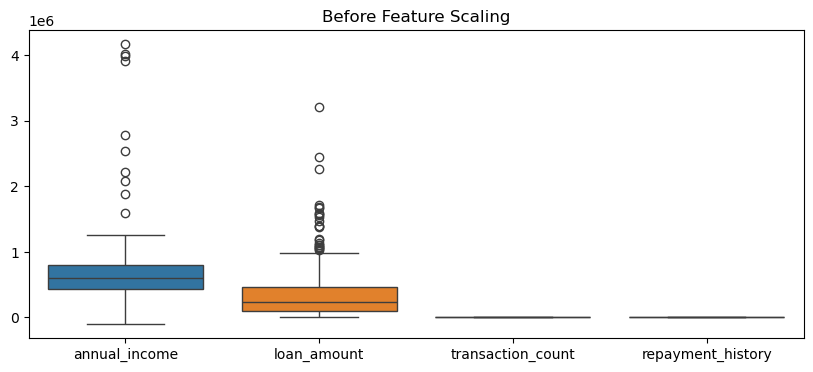

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.boxplot(data=df[num_cols])
plt.title("Before Feature Scaling")
plt.show()


In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()

df_standardized[["annual_income", "loan_amount"]] = scaler.fit_transform(
    df[["annual_income", "loan_amount"]]
)

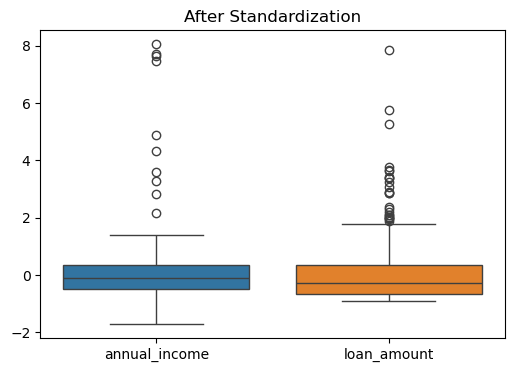

In [149]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df_standardized[["annual_income", "loan_amount"]])
plt.title("After Standardization")
plt.show()

* Min-Max Scaling (Normalization)

In [150]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
df_minmax = df.copy()

df_minmax[num_cols] = minmax.fit_transform(df[num_cols])

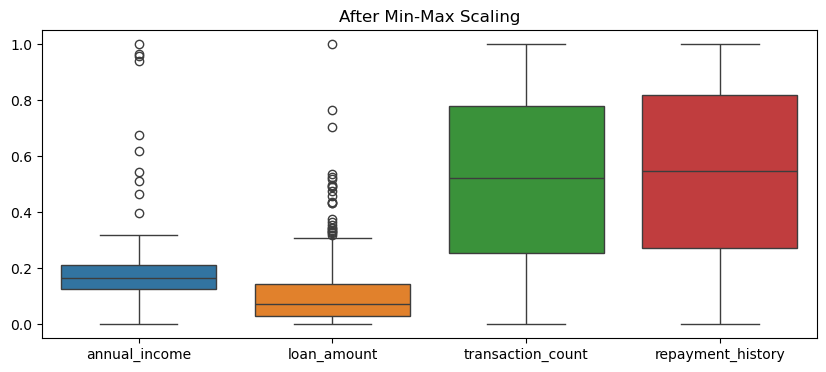

In [151]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_minmax[num_cols])
plt.title("After Min-Max Scaling")
plt.show()

* MaxAbs Scaling

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

maxabs = MaxAbsScaler()
df_maxabs = df.copy()

df_maxabs[num_cols] = maxabs.fit_transform(df[num_cols])

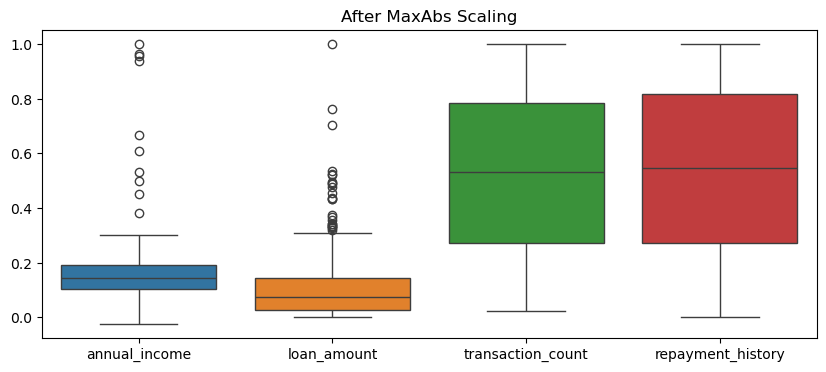

In [153]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_maxabs[num_cols])
plt.title("After MaxAbs Scaling")
plt.show()

* Robust Scaling

In [154]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
df_robust = df.copy()

df_robust[num_cols] = robust.fit_transform(df[num_cols])

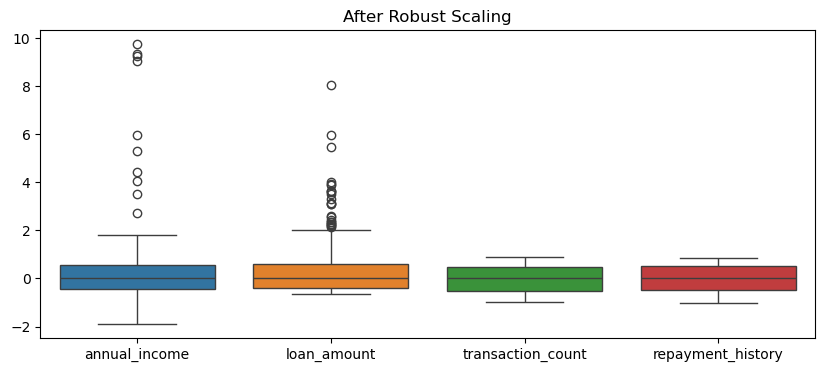

In [155]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_robust[num_cols])
plt.title("After Robust Scaling")
plt.show()

## Part G: Feature Construction & Transformation

* FunctionTransformer

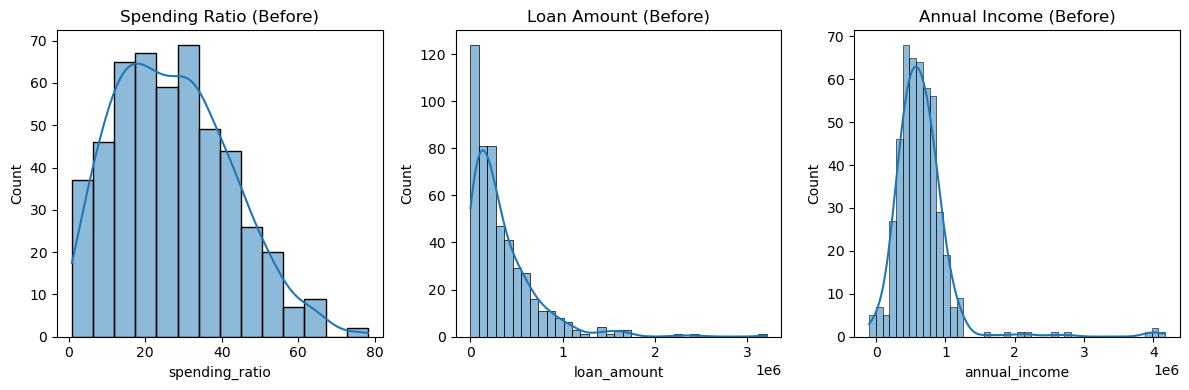

In [156]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.histplot(df["spending_ratio"], kde=True)
plt.title("Spending Ratio (Before)")

plt.subplot(1,3,2)
sns.histplot(df["loan_amount"], kde=True)
plt.title("Loan Amount (Before)")

plt.subplot(1,3,3)
sns.histplot(df["annual_income"], kde=True)
plt.title("Annual Income (Before)")

plt.tight_layout()
plt.show()

In [157]:
df_func = df.copy()

df_func["spending_log"] = np.log1p(df["spending_ratio"])
df_func["spending_reciprocal"] = 1 / (df["spending_ratio"] + 1)
df_func["spending_sqrt"] = np.sqrt(df["spending_ratio"])


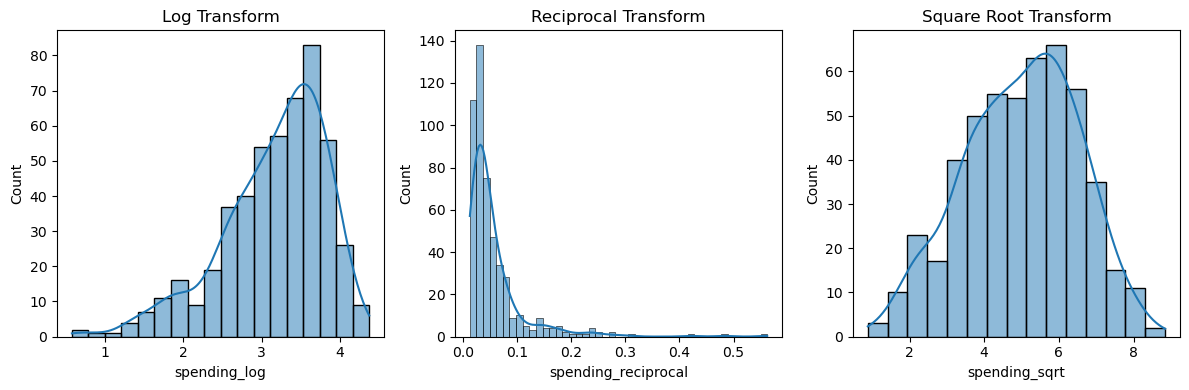

In [158]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.histplot(df_func["spending_log"], kde=True)
plt.title("Log Transform")

plt.subplot(1,3,2)
sns.histplot(df_func["spending_reciprocal"], kde=True)
plt.title("Reciprocal Transform")

plt.subplot(1,3,3)
sns.histplot(df_func["spending_sqrt"], kde=True)
plt.title("Square Root Transform")

plt.tight_layout()
plt.show()

Skewness reduced significantly, smoother distribution.

## PowerTransformer

* Yeo-Johnson Transformation

In [162]:
from sklearn.preprocessing import PowerTransformer

pt_yeo = PowerTransformer(method="yeo-johnson")

df_yeo = df.copy()
df_yeo[["loan_amount", "annual_income"]] = pt_yeo.fit_transform(
    df[["loan_amount", "annual_income"]]
)


In [163]:
pt_yeo = PowerTransformer(method="yeo-johnson")

df_yeo = df.copy()
df_yeo[["loan_amount", "annual_income"]] = pt_yeo.fit_transform(
    df[["loan_amount", "annual_income"]]
)


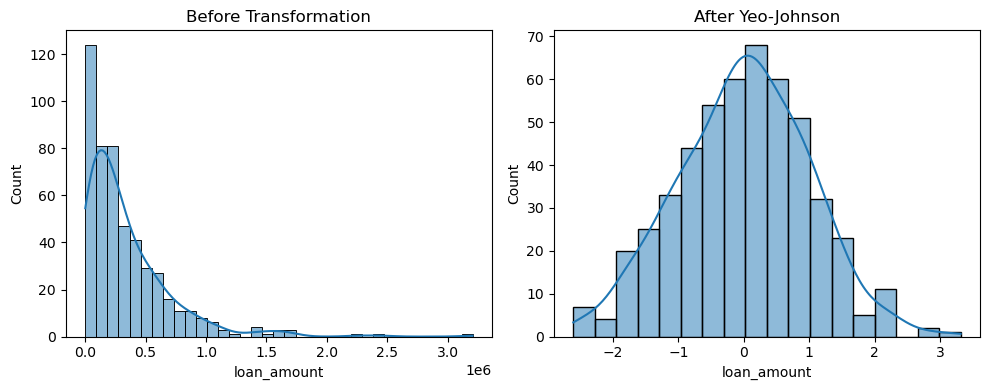

In [164]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df["loan_amount"], kde=True)
plt.title("Before Transformation")

plt.subplot(1,2,2)
sns.histplot(df_yeo["loan_amount"], kde=True)
plt.title("After Yeo-Johnson")

plt.tight_layout()
plt.show()

Distributions become near-normal

Improved symmetry

* ColumnTransforme

In [168]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("log_transform", FunctionTransformer(np.log1p), ["spending_ratio"]),
        ("power_transform", PowerTransformer(method="yeo-johnson"),
         ["loan_amount", "annual_income"])
    ],
    remainder="passthrough"
)

In [169]:
df_transformed = preprocessor.fit_transform(df)

In [ ]:
df.to_csv("Final_Cleaned_Dataset.csv", index=False)
